In [18]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('postsentiment.csv',lineterminator='\n')

# Separate data into high and low ratings
high_ratings = df[(df['overall_rating'] == 4) | (df['overall_rating'] == 5)]
low_ratings = df[(df['overall_rating'] == 1) | (df['overall_rating'] == 2)]


In [4]:

# Function for text processing
def process_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming (you can also use lemmatization)
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    return tokens



In [5]:

# Process text for high and low ratings
high_pros_tokens = high_ratings['pros'].apply(process_text)
low_pros_tokens = low_ratings['pros'].apply(process_text)


In [6]:

# Calculate word frequency for high and low ratings
high_pros_freq = FreqDist([word for tokens in high_pros_tokens for word in tokens])
low_pros_freq = FreqDist([word for tokens in low_pros_tokens for word in tokens])



In [8]:
# Extract common words
common_high_pros_words = [word for word, freq in high_pros_freq.most_common(30)]
common_low_pros_words = [word for word, freq in low_pros_freq.most_common(30)]

print("Common words in high-rated pros:", common_high_pros_words)
print("Common words in low-rated pros:", common_low_pros_words)

Common words in high-rated pros: ['work', 'great', 'good', 'peopl', 'compani', 'opportun', 'benefit', 'environ', 'cultur', 'manag', 'learn', 'lot', 'flexibl', 'balanc', 'team', 'employe', 'place', 'career', 'life', 'pay', 'train', 'friendli', 'get', 'job', 'time', 'support', 'nice', 'best', 'develop', 'experi']
Common words in low-rated pros: ['good', 'work', 'great', 'peopl', 'benefit', 'compani', 'pay', 'get', 'nice', 'job', 'manag', 'lot', 'flexibl', 'opportun', 'time', 'hour', 'learn', 'free', 'staff', 'discount', 'team', 'place', 'employe', 'salari', 'environ', 'balanc', 'offic', 'decent', 'train', 'experi']


In [9]:

# Process text for high and low ratings
high_cons_tokens = high_ratings['cons'].apply(process_text)
low_cons_tokens = low_ratings['cons'].apply(process_text)

In [12]:

# Calculate word frequency for high and low ratings
high_cons_freq = FreqDist([word for tokens in high_cons_tokens for word in tokens])
low_cons_freq = FreqDist([word for tokens in low_cons_tokens for word in tokens])


In [13]:
# Extract common words
common_high_cons_words = [word for word, freq in high_cons_freq.most_common(30)]
common_low_cons_words = [word for word, freq in low_cons_freq.most_common(30)]

print("Common words in high-rated pros:", common_high_cons_words)
print("Common words in low-rated pros:", common_low_cons_words)

Common words in high-rated pros: ['work', 'manag', 'hour', 'time', 'compani', 'get', 'long', 'lot', 'sometim', 'pay', 'peopl', 'balanc', 'much', 'salari', 'good', 'con', 'job', 'need', 'mani', 'hard', 'busi', 'life', 'employe', 'chang', 'make', 'team', 'like', 'difficult', 'year', 'realli']
Common words in low-rated pros: ['manag', 'work', 'peopl', 'get', 'compani', 'employe', 'time', 'pay', 'staff', 'job', 'hour', 'year', 'like', 'team', 'poor', 'make', 'one', 'even', 'mani', 'good', 'much', 'day', 'lot', 'lack', 'custom', 'expect', 'train', 'go', 'salari', 'low']


In [20]:
from nltk.util import ngrams

# Process text for high and low ratings
high_pros_tokens = high_ratings['pros'].apply(process_text)
low_pros_tokens = low_ratings['pros'].apply(process_text)

# Function to generate n-grams
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Extract bi-grams for high and low ratings
high_pros_bigrams = [phrase for tokens in high_pros_tokens for phrase in extract_ngrams(tokens, 3)]
low_pros_bigrams = [phrase for tokens in low_pros_tokens for phrase in extract_ngrams(tokens, 3)]

# Convert bi-grams to strings for easier analysis
high_pros_bigram_strings = [' '.join(phrase) for phrase in high_pros_bigrams]

# Calculate frequency of bi-grams
high_pros_bigram_freq = pd.Series(high_pros_bigram_strings).value_counts()

# Extract common bi-grams



Common phrases in high-rated pros: ['work life balanc', 'great place work', 'good work life', 'good work environ', 'great compani work', 'flexibl work hour', 'great work environ', 'life balanc good', 'good place work', 'great work life']
Common phrases in low-rated pros: ['work life balanc', 'good work life', 'flexibl work hour', 'look good resum', 'great peopl work', 'life balanc good', 'good peopl work', 'none none none', 'great place work', 'flexibl work home']


In [81]:
high_pros_bigram_freq.head(10)

work life balanc       3656
good work environ       738
great compani work      587
flexibl work hour       569
good work cultur        417
great peopl work        401
place start career      247
best place work         233
great benefit great     212
work environ great      210
dtype: int64

In [60]:
# indexes done = ["great place work","good work life","great work environ","great work life", "life balanc good", "good compani work", "work environ good", "good place work", "great work cultur", "great peopl great"
indexes = []
high_pros_bigram_freq = high_pros_bigram_freq.drop(indexes)

In [61]:
common_high_pros_bigrams = high_pros_bigram_freq.head(10).index.tolist()

print("Common phrases in high-rated pros:", common_high_pros_bigrams)

Common phrases in high-rated pros: ['work life balanc', 'good work environ', 'great compani work', 'flexibl work hour', 'good work cultur', 'great peopl work', 'place start career', 'best place work', 'great benefit great', 'work environ great']


In [63]:
highpros = dict(high_pros_bigram_freq[common_high_pros_bigrams])

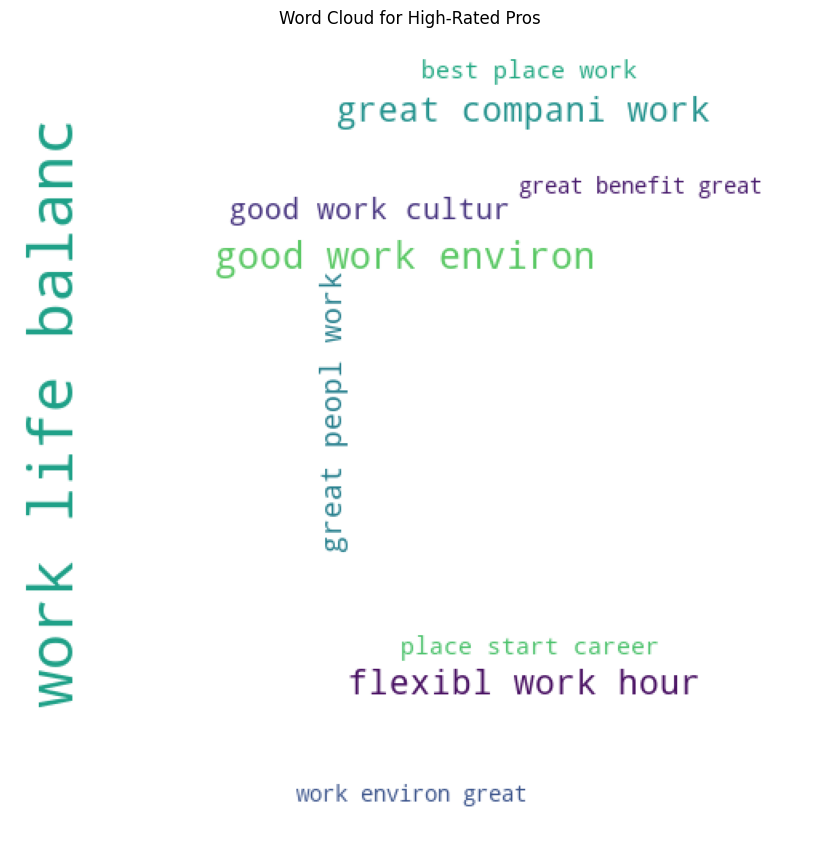

In [90]:
# Plot word clouds
def plot_word_cloud(data, title):
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 12).generate_from_frequencies(data)

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()

# Plot word clouds for common phrases
plot_word_cloud((highpros), "Word Cloud for High-Rated Pros")


In [89]:

# Process text for high and low ratings
high_cons_tokens = high_ratings['cons'].apply(process_text)
low_cons_tokens = low_ratings['cons'].apply(process_text)

# Extract bi-grams for high and low ratings
low_cons_bigrams = [phrase for tokens in low_cons_tokens for phrase in extract_ngrams(tokens, 3)]

# Convert bi-grams to strings for easier analysis
low_cons_bigram_strings = [' '.join(phrase) for phrase in low_cons_bigrams]

# Calculate frequency of bi-grams
low_cons_bigram_freq = pd.Series(low_cons_bigram_strings).value_counts()

# Extract common bi-grams
common_low_cons_bigrams = low_cons_bigram_freq.head(10).index.tolist()

print("Common phrases in low-rated pros:", common_low_cons_bigrams)

KeyboardInterrupt: 

In [83]:
low_cons_bigram_freq.head(10)

long work hour        110
high staff turnov      72
get thing done         55
poor work life         46
high turnov rate       42
great place work       42
get work done          41
manag care employe     39
compani ever work      35
get anyth done         35
dtype: int64

In [82]:
# index = [work long hour", "work hour week", "hour per week", "work hour day"]
indexes = ["work life balanc"]
low_cons_bigram_freq = low_cons_bigram_freq.drop(indexes)


In [84]:
common_low_cons_bigrams = low_cons_bigram_freq.head(10).index.tolist()
print("Common phrases in high-rated pros:", common_low_cons_bigrams)

Common phrases in high-rated pros: ['long work hour', 'high staff turnov', 'get thing done', 'poor work life', 'high turnov rate', 'great place work', 'get work done', 'manag care employe', 'compani ever work', 'get anyth done']


In [85]:
lowcons = dict(low_cons_bigram_freq[common_low_cons_bigrams])

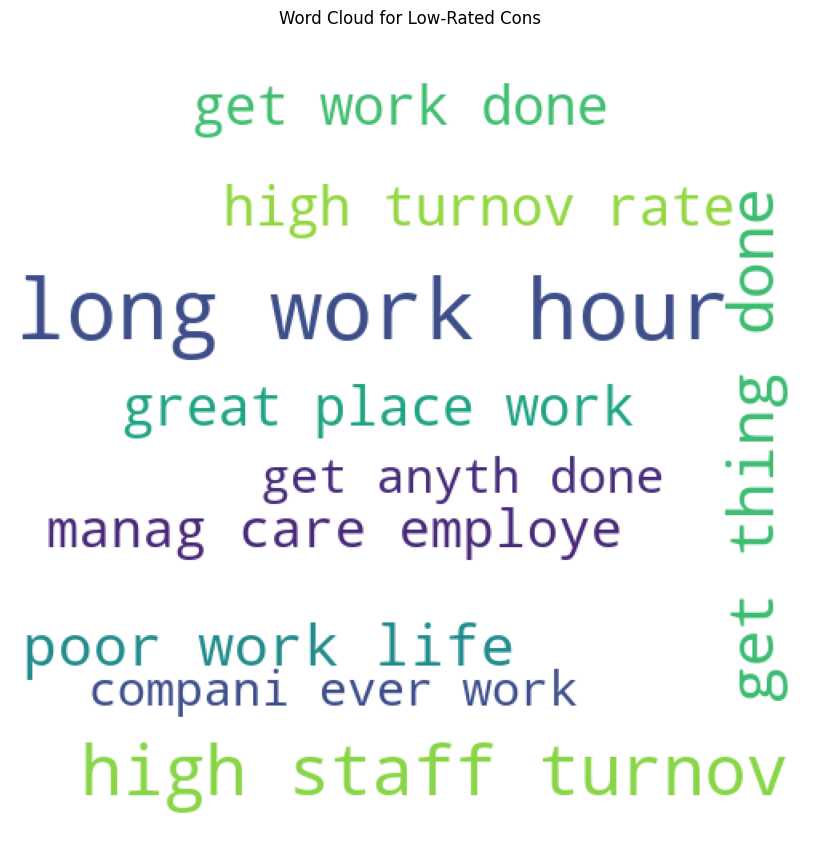

In [86]:
# Plot word clouds for common phrases
plot_word_cloud(lowcons, "Word Cloud for Low-Rated Cons")